In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [12]:
#import pre-processed data
he48 = ad.read_h5ad('/Users/jordankalai/Documents/Stanford/bio265/bio265_project/he48_processed.h5ad')

In [13]:
sc.tl.umap(he48)

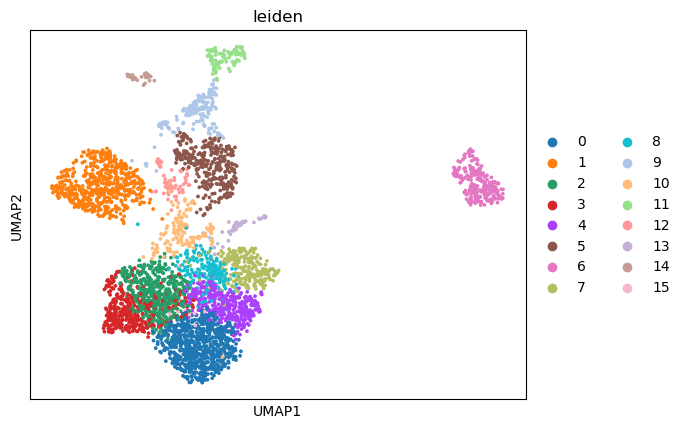

In [14]:
# Plot the first two UMAP dimensions
# Color cells by the cluster they belong to
sc.pl.umap(he48, color=["leiden"])

In [15]:
# Calculate the marker genes for each cell cluster
# Use the wilcoxon test, which performs well for single cell data
# Provide adjusted p-values using the benjamini-hochberg correction
sc.tl.rank_genes_groups(he48, "leiden", method="wilcoxon", corr_method='benjamini-hochberg')

In [16]:
# Store the marker genes in a table
# The number at the start of a column name indicates the cluster
# For each cluster, there are three columns -> the name of the gene, 
# the log2 fold change (how highly the gene is expressed in that cluster compared to others),
# and the adjusted p-value.
# The top 50 genes for each cluster are included, in order of their enrichment in that cluster (based on p-value).

result = he48.uns["rank_genes_groups"]
groups = result["names"].dtype.names
marker_genes = pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names", "logfoldchanges", "pvals_adj"]
    }
).head(50)

#marker_genes.to_csv("./he48_16clusters_marker_genes.csv", index = False)
marker_genes.head(15)

,0_names,0_logfoldchanges,0_pvals_adj,1_names,1_logfoldchanges,1_pvals_adj,2_names,2_logfoldchanges,2_pvals_adj,3_names,...,12_pvals_adj,13_names,13_logfoldchanges,13_pvals_adj,14_names,14_logfoldchanges,14_pvals_adj,15_names,15_logfoldchanges,15_pvals_adj
0,HER_16128.t1:none,2.793355,3.386194e-215,HER_45860.t1:Sp-Btub3,3.630664,2.252162e-258,HER_29018.t1:Sp-MacpfD.3,2.830693,1.981260e-132,HER_21799.t1:Sp-Cara14LA,...,1.006207e-25,HER_46925.t1:Sp-Mif4,4.976131,2.007983e-19,HER_42513.t1:Sp-Srcr177,6.886854,3.213070e-18,HER_37722.t1:Sp-Hypp_1457,5.829232,0.000036
1,HER_47969.t1:none,2.445162,5.827818e-195,HER_28.t1:Sp-FbsL_2,5.444964,3.250483e-234,HER_21799.t1:Sp-Cara14LA,1.839821,2.776467e-105,HER_29018.t1:Sp-MacpfD.3,...,5.086031e-14,HER_134.t1:Sp-Nxn_1,4.139631,2.007983e-19,HER_45847.t1:Sp-Astacin4,8.165260,2.099861e-17,HER_45847.t1:Sp-Astacin4,5.399904,0.000036
2,HER_7595.t1:Sp-Apob,2.133103,2.221538e-190,HER_29171.t1:none,5.762208,7.054382e-193,HER_29000.t1:Sp-MacpfD.3,2.201933,4.395454e-101,HER_8002.t1:Sp-Slsp_1,...,5.234468e-11,HER_7886.t1:Sp-Hypp_1597,4.280129,1.622567e-18,HER_37722.t1:Sp-Hypp_1457,7.282673,3.788744e-16,HER_42513.t1:Sp-Srcr177,5.080197,0.000036
3,HER_49824.t1:Sp-Ars,2.371336,3.208505e-156,HER_30721.t1:Sp-Cycs_2,1.400260,8.568588e-172,HER_3741.t1:Sp-Anxn,1.761420,7.094638e-88,HER_3741.t1:Sp-Anxn,...,2.906765e-08,HER_47882.t1:Sp-CalmL1,3.558728,1.182700e-16,HER_48026.t1:Sp-6Afcol,7.398757,3.107384e-15,HER_7595.t1:Sp-Apob,2.436376,0.005150
4,HER_9762.t1_HER_9764.t1:Sp-AnL4,2.225760,1.133831e-155,HER_19128.t2:Sp-CalmL1,1.959773,6.089110e-138,HER_23469.t1:Sp-Sdc,1.224416,2.307101e-72,HER_32297.t1:Sp-Ephrin,...,1.584453e-07,HER_4864.t1_HER_4874.t1:Sp-Agpat5,2.456703,7.280148e-16,HER_7690.t1:none,7.898321,3.055472e-14,HER_47882.t1:Sp-CalmL1,2.890850,0.007865
5,HER_17415.t1:Sp-Ckb,1.563637,9.168133e-114,HER_19127.t1:Sp-CalmL2,2.272007,1.190973e-133,HER_17967.t1:Sp-Map1a/1B_Lc3L2,1.155849,6.164198e-62,HER_23469.t1:Sp-Sdc,...,4.178224e-07,HER_46284.t1:Sp-Cara2LB_1,3.304439,2.027989e-15,HER_40156.t1:Sp-185/333D1,7.572637,4.580318e-14,HER_134.t1:Sp-Nxn_1,2.653261,0.010432
6,HER_10974.t1:Sp-Hbn,3.400166,7.858190e-100,HER_24381.t1:Sp-HH2az,1.288267,2.067504e-131,HER_20104.t1:Sp-Tppp3,1.433857,1.140993e-53,HER_49824.t1:Sp-Ars,...,4.949130e-06,HER_21637.t1:Sp-Aldh2,2.571035,2.027989e-15,HER_47882.t1:Sp-CalmL1,4.095412,4.917438e-14,HER_9898.t1:Sp-Bhmt_1,3.625402,0.010569
7,HER_7898.t1:Sp-Pdcd4,1.224566,6.068483e-98,HER_35876.t1:Sp-Atub13,1.775120,6.859816e-118,HER_20850.t1:Sp-Egfi,1.844506,7.901755e-50,HER_40059.t1:Sp-Hox7,...,6.911982e-06,HER_12207.t1:Sp-Nme1,3.443765,4.193938e-15,HER_34053.t1_HER_34055.t1:none,4.113299,1.575630e-10,HER_34053.t1_HER_34055.t1:none,2.897691,0.013679
8,HER_23469.t1:Sp-Sdc,1.189049,1.787122e-91,HER_45861.t1:Sp-Btub3,1.838811,1.240037e-109,HER_5235.t1:Sp-Otof,1.207566,1.864327e-45,HER_23964.t1:Sp-Gsn,...,1.170143e-05,HER_47602.t1:Sp-Fmo2_2,3.697728,4.728602e-15,HER_6994.t1:Sp-TxnL3,2.517891,2.412633e-10,HER_40156.t1:Sp-185/333D1,4.885100,0.022186
9,HER_17866.t1:Sp-Six3,2.632477,6.600019e-91,HER_35862.t1:Sp-Atub13,1.954564,1.029641e-102,HER_49824.t1:Sp-Ars,1.676819,3.979065e-39,HER_29000.t1:Sp-MacpfD.3,...,6.578620e-05,HER_19785.t1:none,2.761846,5.363475e-15,HER_45489.t1:Sp-Cycpln,5.920933,9.173850e-10,HER_7690.t1:none,5.267035,0.109620


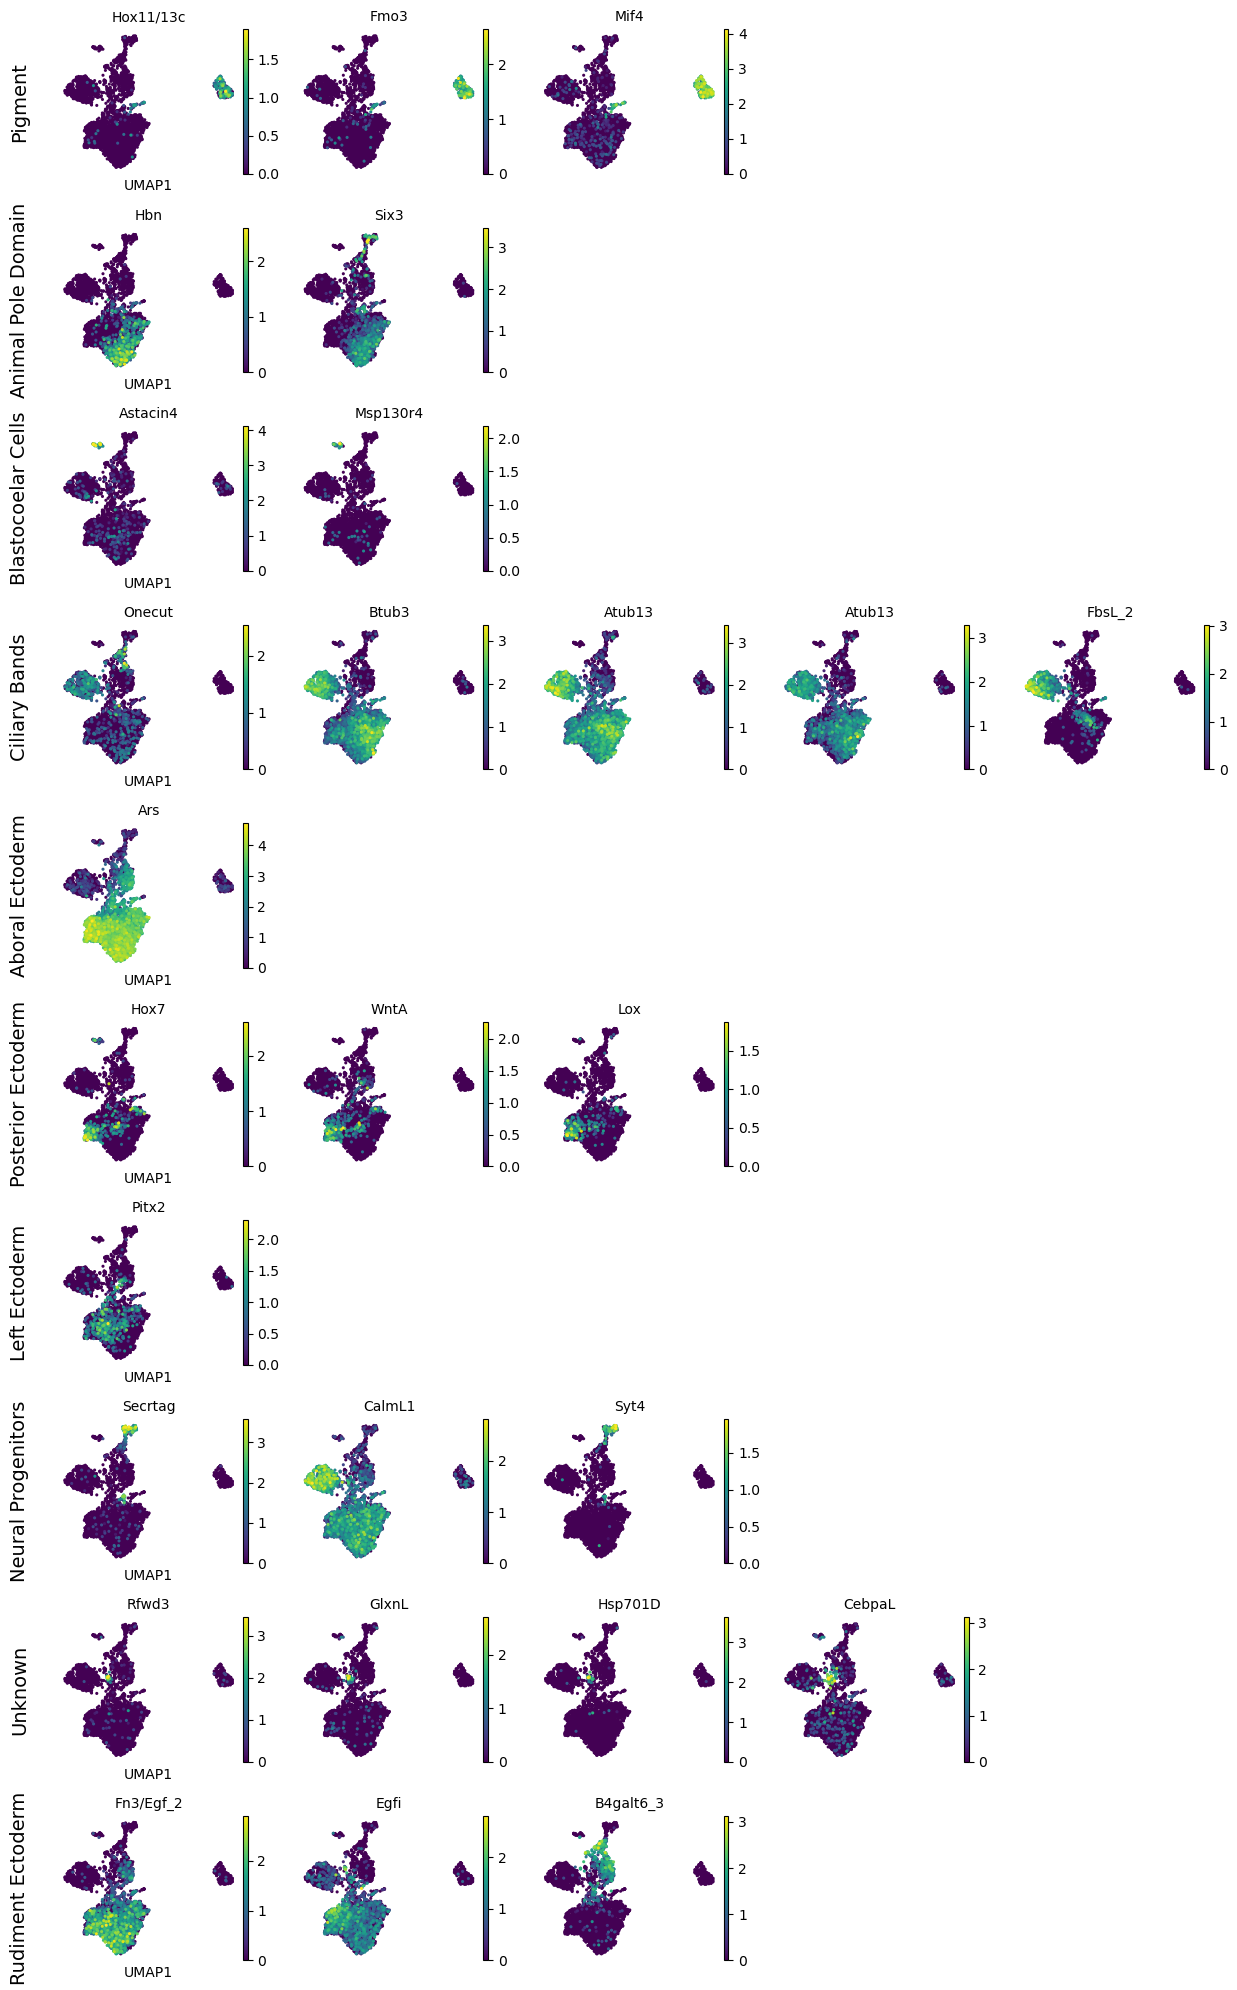

In [22]:
# In this example we want to show UMAPs of different cell type markers,
# with markers of a single cell type in one row
# and with a different number of markers per cell type (row)

# Marker genes- collected from McDonald et. al. + other papers to cite
marker_genes = {
    "Pigment": ["HER_21404.t1:Sp-Hox11/13c", "HER_47443.t1:Sp-Fmo3", "HER_46925.t1:Sp-Mif4"],
    "Animal Pole Domain": ["HER_10974.t1:Sp-Hbn", "HER_17866.t1:Sp-Six3"],
    "Blastocoelar Cells": ["HER_45847.t1:Sp-Astacin4", "HER_28292.t1:Sp-Msp130r4"],
    "Ciliary Bands": ["HER_33009.t1:Sp-Onecut", "HER_45861.t1:Sp-Btub3", "HER_35876.t1:Sp-Atub13", "HER_35862.t1:Sp-Atub13", "HER_28.t1:Sp-FbsL_2"],
    "Aboral Ectoderm": ["HER_49824.t1:Sp-Ars"], #https://bioone.org/journals/zoological-science/volume-18/issue-6/zsj.18.757/Body-Plan-of-Sea-Urchin-Embryo--An-Ancestral-Type/10.2108/zsj.18.757.full?tab=ArticleLinkFigureTable
    "Posterior Ectoderm": ["HER_40059.t1:Sp-Hox7", "HER_10395.t1_HER_10396.t1:Sp-WntA", "HER_48747.t1:Sp-Lox"],
    "Left Ectoderm": ["HER_23589.t1:Sp-Pitx2"],
    "Neural Progenitors": ["HER_45795.t1:Sp-Secrtag", "HER_19128.t2:Sp-CalmL1", "HER_10174.t1:Sp-Syt4"],
    "Unknown": ["HER_33417.t1:Sp-Rfwd3", "HER_17148.t1:Sp-GlxnL", "HER_47859.t1:Sp-Hsp701D", "HER_45097.t1:Sp-CebpaL",],
    "Rudiment Ectoderm": ["HER_20019.t1:Sp-Fn3/Egf_2", "HER_20850.t1:Sp-Egfi", "HER_13245.t1_HER_13243.t1:Sp-B4galt6_3"],
    #"Ribosomal":["HER_49716.t1:Sp-Rpl21", "HER_728.t1:Sp-Rpl6", "HER_22572.t1:Sp-Rpl11", "HER_11034.t1:Sp-Rps17", "HER_30087.t1:Sp-Rpl37a", "HER_25966.t1:Sp-Rpl36a"]
}
# Make Axes
# Number of needed rows and columns (based on the row with the most columns)
nrow = len(marker_genes)
ncol = max([len(vs) for vs in marker_genes.values()])
fig, axs = plt.subplots(nrow, ncol, figsize=(2.5 * ncol, 2 * nrow))
# Plot expression for every marker on the corresponding Axes object
for row_idx, (cell_type, markers) in enumerate(marker_genes.items()):
    col_idx = 0
    for marker in markers:
        ax = axs[row_idx, col_idx]
        sc.pl.umap(he48, color=marker, ax=ax, show=False, frameon=False, s=20)

        # take out the part after "-" for the title
        marker_name = marker.split(":")[-1]  # take out 'Sp-*' part first
        marker_name = marker_name.split("-")[-1]  # take out the other part after "-"

        ax.set_title(marker_name, fontsize=10)  # Set the title
        # Add cell type as row label - here we simply add it as ylabel of
        # the first Axes object in the row
        if col_idx == 0:
            # We disabled axis drawing in UMAP to have plots without background and border
            # so we need to re-enable axis to plot the ylabel
            ax.axis("on")
            ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="on",
                labelbottom="off",
            )
            ax.set_ylabel(cell_type + "\n", rotation=90, fontsize=14)
            ax.set(frame_on=False)
        col_idx += 1
    # Remove unused column Axes in the current row
    while col_idx < ncol:
        axs[row_idx, col_idx].remove()
        col_idx += 1
# Alignment within the Figure
fig.tight_layout()
plt.savefig('/Users/jordankalai/Documents/Stanford/bio265/markergenes_byregion.png')

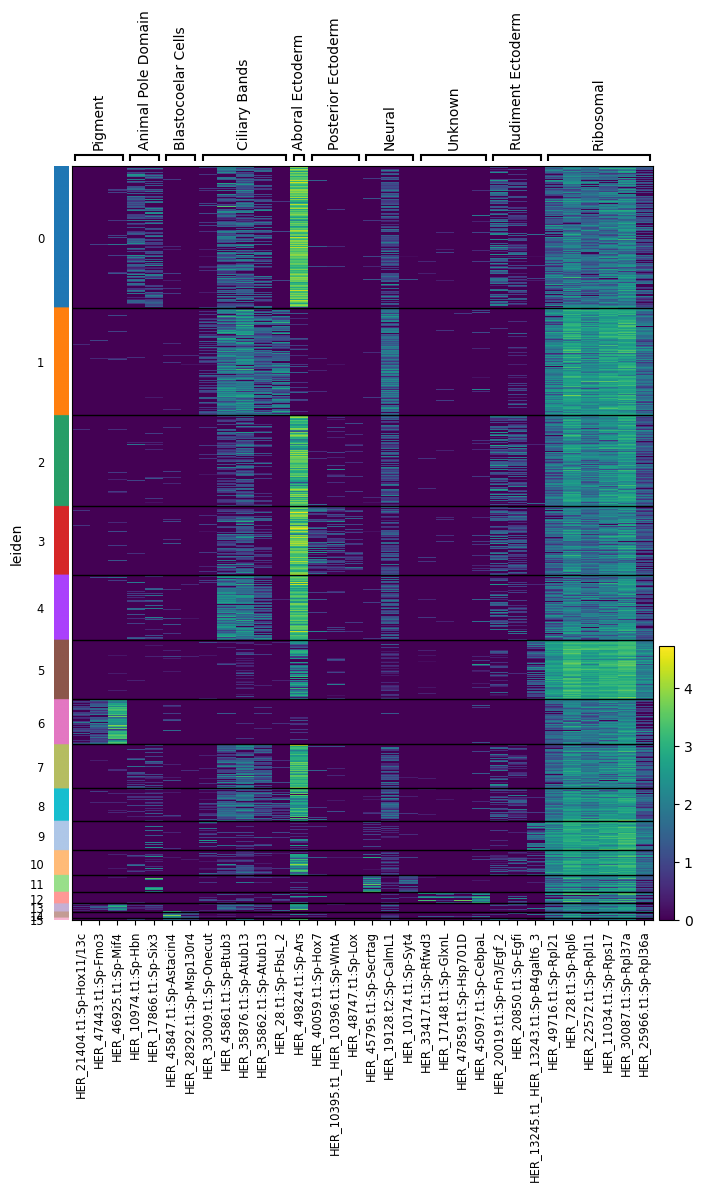

<Figure size 640x480 with 0 Axes>

In [21]:
#create a heatmap labeled by identified region, used to help identify clusters
ax = sc.pl.heatmap(
    he48, marker_genes, groupby="leiden", cmap="viridis", dendrogram=False, figsize=(8,10)
)
plt.savefig('/Users/jordankalai/Documents/Stanford/bio265/heatmap_byregion.png')

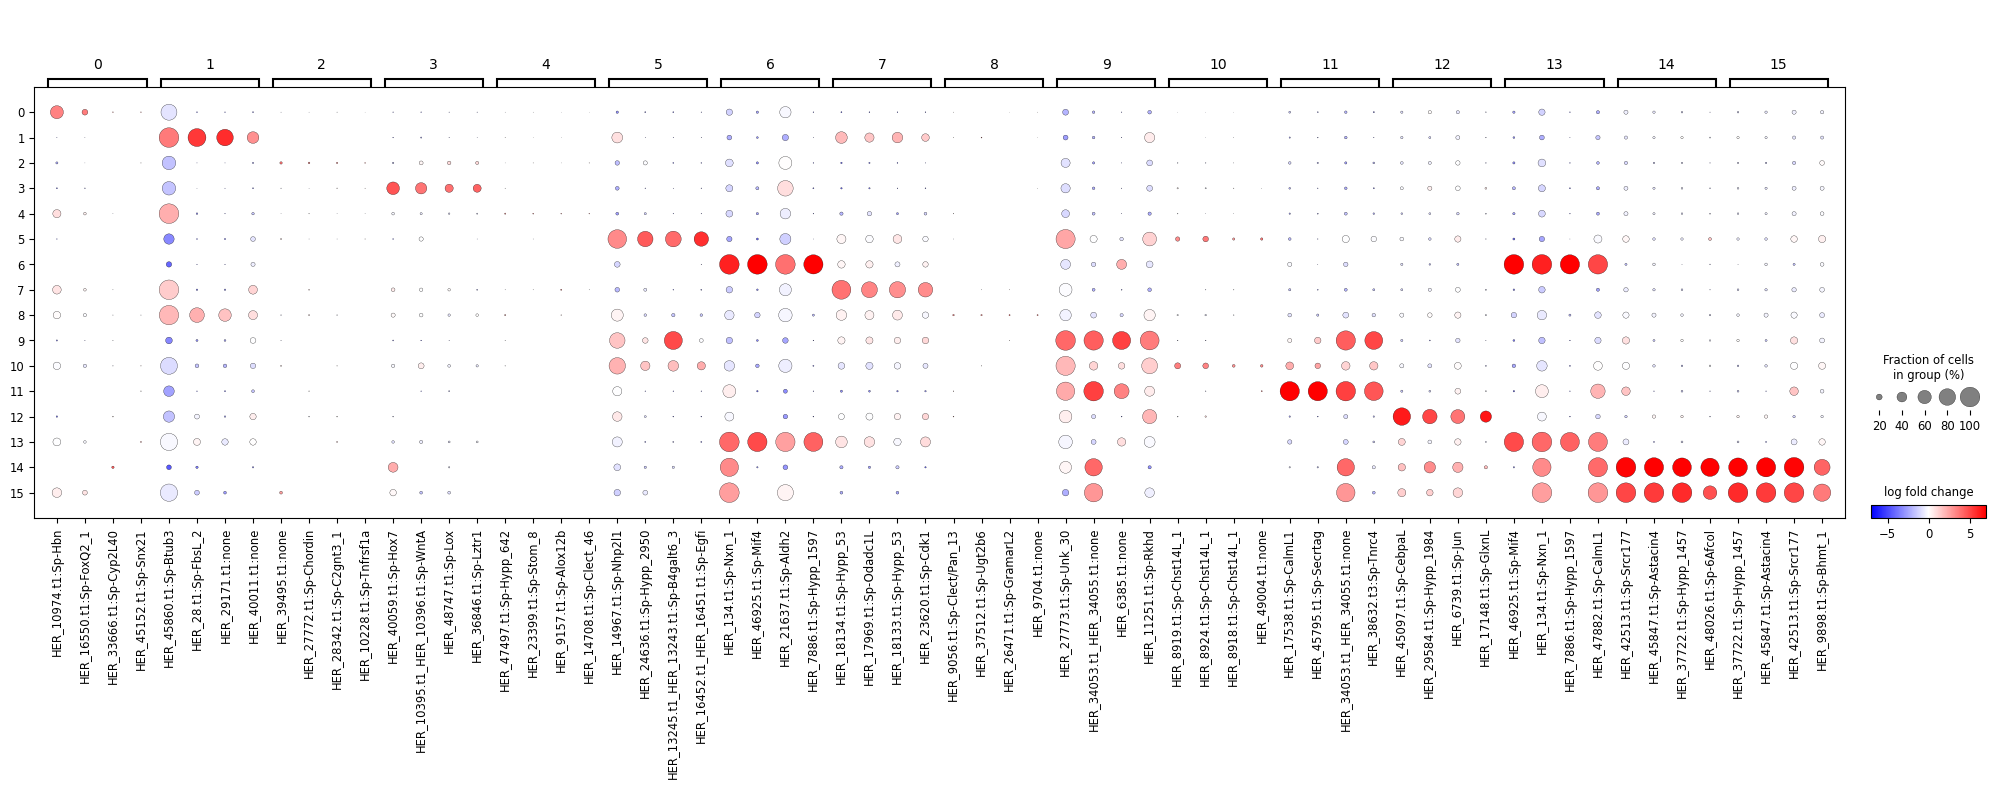

In [19]:
#supplemental scanpy code to rank exrpression of genes compared to other clusters b log fold change for top 3 genes
sc.pl.rank_genes_groups_dotplot(
    he48,
    n_genes=4,
    values_to_plot="logfoldchanges",
    min_logfoldchange=3,
    vmax=7,
    vmin=-7,
    cmap="bwr",
    dendrogram=False
)

Axes: Axes(0.146628,0.15;0.568915x0.73)


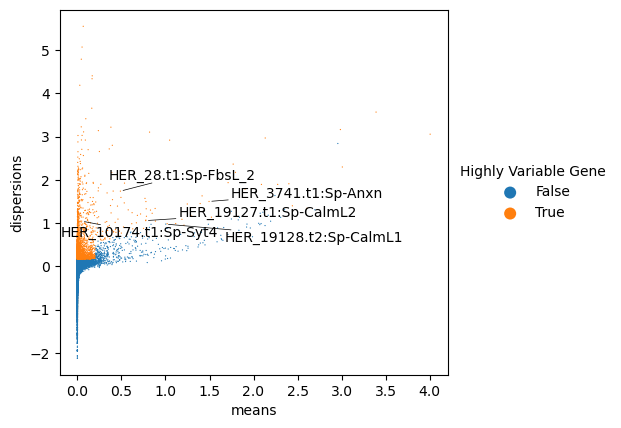

In [54]:
#create labeled highly variable plot with some interesting genes
# Package used for adding well aligned labels on the plot
#!pip install adjustText
from adjustText import adjust_text

with plt.rc_context({"figure.figsize": (5, 5)}):
    x = "means"
    y = "dispersions"
    color = "is_highly_variable"
    he48.var["is_highly_variable"] = (
        he48.var["highly_variable"].astype(bool).astype(str)
    )
    ax = sc.pl.scatter(he48, x=x, y=y, color=color, show=False)
    print("Axes:", ax)
    # Move plot title from Axes to Legend
    ax.set_title("")
    ax.get_legend().set_title("Highly Variable Gene")

    # Labels

    # Select genes to be labeled
    texts = []
    #highlighting proteins relating to calcium right now --> could be good to maybe highlight ones that relate to the cytoskeleton: gsn, 
    genes = [
        "HER_19128.t2:Sp-CalmL1",
        "HER_19127.t1:Sp-CalmL2",
        "HER_3741.t1:Sp-Anxn", #calcium-dependent phospholipid-binding proteins
        "HER_28.t1:Sp-FbsL_2",
        "HER_10174.t1:Sp-Syt4",
    ]
    for gene in genes:
        # Position of object to be marked
        #gene = gene.split(":")[-1]  # take out 'Sp-*' part
        #gene = gene.split("-")[-1]  # take out the final part after "-"
        x_loc = he48.var.at[gene, x]
        y_loc = he48.var.at[gene, y]
        # Text color
        color_point = "k"
        # take the part after "-" for the title
        #print(gene)
        texts.append(ax.text(x_loc, y_loc, gene, color=color_point, fontsize=10))

    # Label selected genes on the plot
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.show()